# Introduction to Machine Learning 3
Na-Rae Han, 10/19/2019

## Beyond Naive Bayes: other ML methods?
- We will try **SVM** (**Support Vector Machine**). 
- Textbook section on SVM: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

## Feature engineering, categorical data
- Feature engineering
- Handling categorical data
- Testbook section: https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
- A better explanation here: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
- And here: http://pbpython.com/categorical-encoding.html

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn               # sklearn is the ML package we will use
import seaborn as sns        # seaborn graphical package

### Data preparation step

In [3]:
from sklearn.datasets import fetch_20newsgroups

# We will use the same 4 categories
cats = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=cats)
test = fetch_20newsgroups(subset='test', categories=cats)

In [4]:
type(train)

<class 'sklearn.datasets.base.Bunch'>

In [5]:
dir(train)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

In [6]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [7]:
train.target
train.target[5]
train.target_names

array([2, 2, 1, ..., 2, 3, 1])

3

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [8]:
len(train.data)
len(test.data)

2153

1432

In [9]:
# TfidfVectorizer is essentially CountVectorizer + TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore words found in over 50% of documents, ignore words found in just 1 document. 
# 1000 most frequent words, remove stop words. 
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(train.data)
y_train = train.target
X_test = vectorizer.transform(test.data)
y_test = test.target

# Cumbersome. Alternative: using pipeline. 

### Time to build: Support Vector Classifier

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
labels = model.predict(X_test)
labels

array([3, 0, 1, ..., 1, 2, 0])

In [12]:
y_test[:20]
labels[:20]

array([3, 0, 1, 0, 1, 2, 1, 1, 0, 1, 3, 2, 3, 3, 2, 1, 0, 2, 1, 2])

array([3, 0, 1, 0, 1, 2, 1, 1, 0, 1, 3, 2, 3, 3, 3, 1, 0, 2, 1, 3])

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, labels)
cm

array([[356,  20,   8,   5],
       [ 17, 367,   5,   5],
       [  6,   9, 347,  36],
       [ 22,  12,  44, 173]])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.86801675977653636

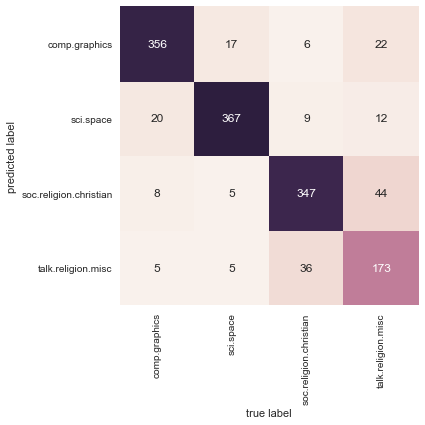

In [15]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Is this better than Naive Bayes?
What other classification algorithms are there?
- Logistic Regression
- K-Nearst Neighbors
- Decision Tree, Random Forest https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
- Deep Learning

## Categorical data
Margaret's ASL class data as an example:
https://github.com/Data-Science-for-Linguists/Class-Practice-Repo/blob/master/todo3/asl-background-cut_margaret.csv

(Make sure to click on "Raw" button to get to raw CSV file format)

In [16]:
url = 'https://raw.githubusercontent.com/Data-Science-for-Linguists/Class-Practice-Repo/master/todo3/asl-background-cut_margaret.csv'
df = pd.read_csv(url)

In [17]:
df.head()
df.tail()

,NAME,YEAR,LEVEL,GRADE,MIDTERM,FINAL
0,Madison,Sophomore,1,A,90,95
1,Amy,Sophomore,1,B-,83,79
2,Sean,Sophomore,3,B,82,90
3,Adam,Freshman,1,A,97,91
4,Harper,Sophomore,3,B+,79,94


,NAME,YEAR,LEVEL,GRADE,MIDTERM,FINAL
31,Emily,Sophomore,3,B,81,89
32,Sandy,Freshman,1,B-,82,79
33,Mo,Freshman,1,B,78,89
34,Caitlyn,Senior,5,A-,90,92
35,Kevin,Senior,5,A,95,96


### Questions: 
- Which columns are truly categorical? 
- How to best convert them to numerical values? 

### Back to ETS data

In [18]:
ets_df = pd.read_csv('ets_df_final.csv', index_col=0)
ets_df.head()

FileNotFoundError: File b'ets_df_final.csv' does not exist

### Questions:
- Which columns are truly categorical?

`L1`
- As classification target?
- As classificatoin feature?

`Score`
- As classification target?
- As classification feature? 

### Pseudo-categorical data must be converted into numerical values
`Score` should be converted into corresponding numbers, both as target and feature. 
- Low: 1
- Medium: 2
- High: 3

In predicting `Score`, you will be building a **REGRESSION model**, not a classification model. 
- Predicted values will come out as 0.8, 1.2, 2.8, 3.1 etc.
- The continuous numeric values will then have to be binned into discrete categories such as 1, 2, 3 or 'Low', 'Medium', 'High'. 

### Truly categorical data
- Can be used as classification target as is. You will be building a true **CLASSIFICATION model**. 
- When used as *features*, they must be DECOMPOSED into a set of binary, independent features.
   1. Option 1: Encode value labels as integers: map 'Korean' 0, 'German' to 1, 'Japanese' to 3 (through `LabelEncoder`)
      - This step alone isn't enough. (WHY?)
      - You must then encode map integer labels to a set of binary-valued columns (through `OneHotEncoder`)
   2. Option 2. Transform the categorical column into a set of **dummy variables** (through `pandas.get_dummes`) 
      

#### Option 1: LabelEncoder + OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
mini = ets_df[:10][['Prompt', 'L1', 'Score']]
mini

In [ ]:
lenc = LabelEncoder()
lenc.fit(mini['L1'])
lenc.transform(mini['L1'])

In [ ]:
mini['L1'] = lenc.transform(mini['L1'])
mini

In [ ]:
ohenc = OneHotEncoder()
ohenc.fit_transform(mini[['L1']]).toarray()
#ohenc.fit(mini['L1'].values.reshape(-1,1))
#ohenc.transform(mini['L1'].values.reshape(-1,1))

#### Option 2: Use `pandas.get_dummies`

In [ ]:
mini = ets_df[:10][['Prompt', 'L1', 'Score']]
mini

In [ ]:
pd.get_dummies(mini, columns=['L1'])